In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset_path = '/Users/tina/Documents/LUMEN/lumen_dataset/data/lumen/export_df.parquet'
data = pd.read_parquet(dataset_path)
data['datum_otkazivanja_rezervacije'] = pd.to_datetime(data['datum_otkazivanja_rezervacije'], errors='coerce')
data['broj_djece_gostiju'] = data['broj_djece_gostiju'].astype(int)

In [71]:
#kreiranje atributa broj_gostiju = broj_odraslih_gostiju + broj_djece_gostiju
data['ukupan_broj_gostiju'] = data['broj_odraslih_gostiju'] + data['broj_djece_gostiju']
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   hotel_id                       119210 non-null  int32         
 1   datum_dolaska                  119210 non-null  datetime64[ns]
 2   datum_kreiranja_rezervacije    119210 non-null  datetime64[ns]
 3   datum_odjave                   119210 non-null  datetime64[ns]
 4   datum_otkazivanja_rezervacije  44199 non-null   datetime64[ns]
 5   broj_odraslih_gostiju          119210 non-null  int64         
 6   broj_djece_gostiju             119210 non-null  int64         
 7   zemlja_gosta                   119210 non-null  object        
 8   kanal_prodaje_id               119210 non-null  int32         
 9   tip_sobe_id                    119210 non-null  int32         
 10  cijena_nocenja                 119210 non-null  float64       
 11  

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,ukupan_broj_gostiju
0,0,2015-07-01,2015-01-21,2015-07-01,NaT,2,0,PRT,0,0,100.000000,Check-Out,1313223,1077152,2
1,0,2015-07-01,2015-06-10,2015-07-01,NaT,2,0,PRT,0,0,100.000000,Check-Out,1313224,1017906,2
2,0,2015-07-01,2015-05-13,2015-07-02,NaT,1,0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1
3,0,2015-07-01,2014-05-30,2015-07-02,NaT,1,0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1
4,0,2015-07-01,2014-07-06,2015-07-03,NaT,2,0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2


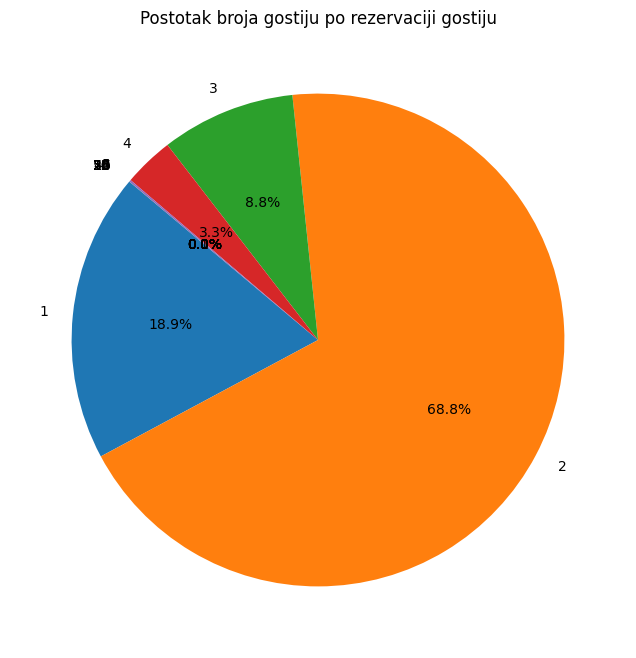

In [72]:
# Izračunavanje frekvencija za broj ljudi po rezervaciji 
frekvencija_po_broju_gostiju = data['ukupan_broj_gostiju'].value_counts().sort_index()

# Kreiranje torta dijagrama za broj gostiju po rezervaciji
plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_gostiju, labels=frekvencija_po_broju_gostiju.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak broja gostiju po rezervaciji gostiju')
plt.show()


In [73]:
frekvencija_po_broju_djece = data['broj_djece_gostiju'].value_counts(normalize=True) * 100

# Sortiranje serije po indeksu kako bi redoslijed bio od 0 do maksimalnog broja djece
frekvencija_po_broju_djece = frekvencija_po_broju_djece.sort_index()

# Ispisivanje postotaka
print("Postotak rezervacija za svaki broj djece:")
print(frekvencija_po_broju_djece)

broj_rezervacija_10 = data[data['broj_djece_gostiju'] == 10].shape[0]
broj_rezervacija_9 = data[data['broj_djece_gostiju'] == 9].shape[0]
broj_rezervacija_3 = data[data['broj_djece_gostiju'] == 3].shape[0]

# Ispis rezultata
print(f"Točan broj rezervacija s brojem djece 10: {broj_rezervacija_10}")
print(f"Točan broj rezervacija s brojem djece 9: {broj_rezervacija_9}")
print(f"Točan broj rezervacija s brojem djece 3: {broj_rezervacija_3}")

Postotak rezervacija za svaki broj djece:
broj_djece_gostiju
0     92.171798
1      4.568409
2      3.164164
3      0.093113
9      0.000839
10     0.001678
Name: proportion, dtype: float64
Točan broj rezervacija s brojem djece 10: 2
Točan broj rezervacija s brojem djece 9: 1
Točan broj rezervacija s brojem djece 3: 111


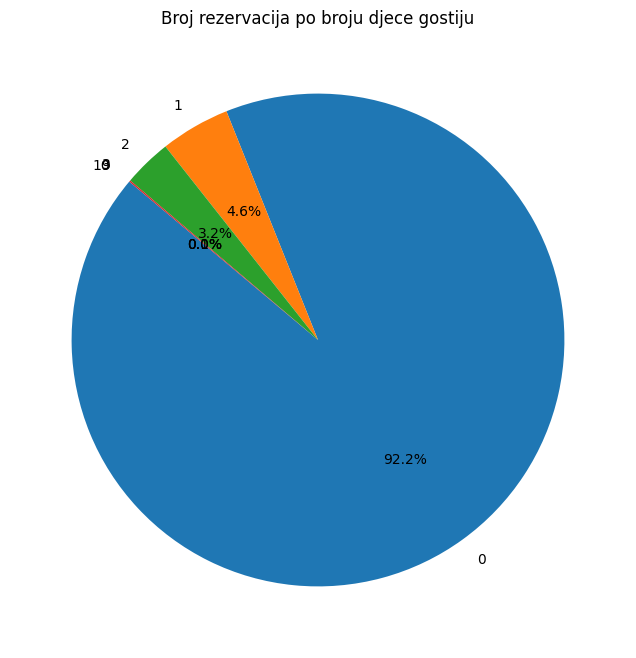

In [74]:
# Izračunavanje frekvencija za broj djece po rezervaciji 
frekvencija_po_broju_djece = data['broj_djece_gostiju'].value_counts().sort_index()

# Kreiranje torta dijagrama za broj djece po rezervaciji
plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_djece, labels=frekvencija_po_broju_djece.index, autopct='%1.1f%%', startangle=140)
plt.title('Broj rezervacija po broju djece gostiju')
plt.show()


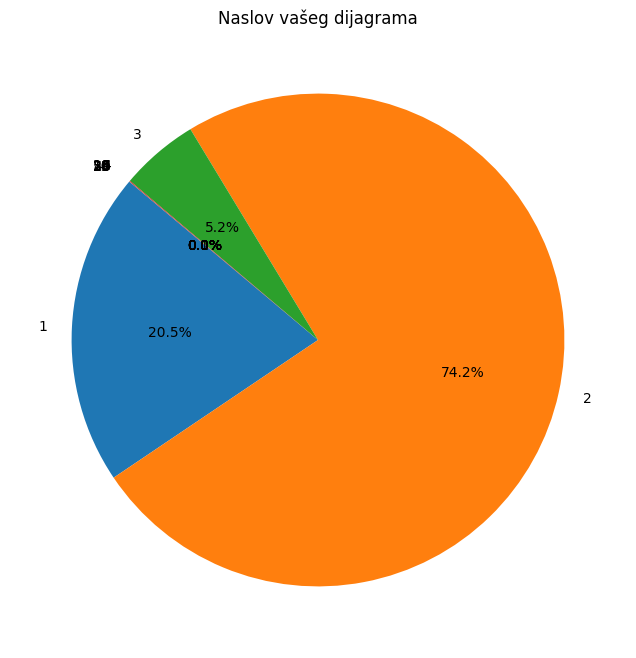

In [75]:
# Izračunavanje frekvencija za broj odraslih za rezervacije bez djece
frekvencija_po_broju_odraslih_bez_djece=data_bez_djece['broj_odraslih_gostiju'].value_counts().sort_index()

# Kreiranje torta dijagrama za broj djece po rezervaciji
plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_odraslih_bez_djece, labels=frekvencija_po_broju_odraslih_bez_djece.index, autopct='%1.1f%%', startangle=140)
plt.title('Naslov vašeg dijagrama')
plt.show()

In [76]:
filtrirani_data = data[data['broj_djece_gostiju'] > 2]
pd.set_option('display.max_rows', None)

# Ispis prvih nekoliko redaka filtriranog DataFrame-a
filtrirani_data.head()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,ukupan_broj_gostiju
328,0,2015-07-12,2015-07-09,2015-07-26,2015-07-12,2,10,PRT,2,2,230.333630,No-Show,1313551,1038409,12
3571,0,2015-12-24,2015-11-21,2015-12-30,2015-12-16,2,3,PRT,0,4,69.397440,Canceled,1316794,1085610,5
5183,0,2016-04-19,2016-02-23,2016-04-28,2016-02-24,2,3,PRT,2,4,175.274403,Canceled,1318406,1085109,5
6675,0,2016-06-24,2016-02-06,2016-06-25,2016-06-24,1,3,PRT,0,6,180.317450,Canceled,1319898,1107098,4
6742,0,2016-06-28,2015-07-05,2016-07-08,2015-10-12,2,3,PRT,2,6,178.057188,Canceled,1319965,1034082,5


In [77]:
##analiza broj_odraslih_gostiju

#računanje srednje vrijednosti broj_odraslih_gostiju
mean_odrasli = data['broj_odraslih_gostiju'].mean()
print(f'Aritmetička srednja vrijednost broja odraslih gostiju: {mean_odrasli}')

#računanje standardne devijacije broj_odraslih_gostiju
std_odrasli = data['broj_odraslih_gostiju'].std()
print(f'Standardna devijacija broja odraslih gostiju: {std_odrasli}')

#računanje medijana broj_odraslih_gostiju
median_odrasli = data['broj_odraslih_gostiju'].median()
print(f'Standardna devijacija broja odraslih gostiju: {median_odrasli}')

#računanje medijana broj_odraslih_gostiju
mod_odrasli = data['broj_odraslih_gostiju'].mode()
print(f'Mod broja odraslih gostiju: {mod_odrasli}')

Aritmetička srednja vrijednost broja odraslih gostiju: 1.8592064424125492
Standardna devijacija broja odraslih gostiju: 0.5751855797939895
Standardna devijacija broja odraslih gostiju: 2.0
Mod broja odraslih gostiju: 0    2
Name: broj_odraslih_gostiju, dtype: int64


ukupan_broj_gostiju
1     22581
2     82051
3     10495
4      3929
5       137
6         1
10        2
12        2
20        2
26        5
27        2
40        1
50        1
55        1
Name: count, dtype: int64


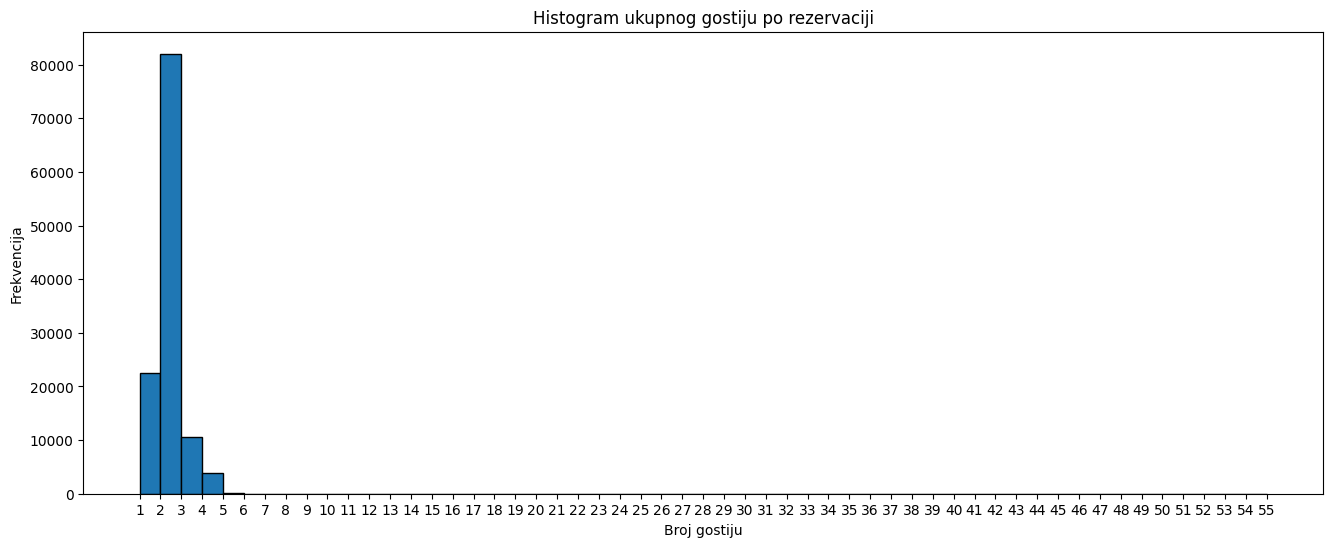

In [78]:
#frekvencijska tablica za ukupan broj gostiju 
frekvencijska_tablica_uk = data['ukupan_broj_gostiju'].value_counts().sort_index()
print(frekvencijska_tablica_uk)
plt.figure(figsize=(16, 6))
data['ukupan_broj_gostiju'].hist(bins=range(1, data['ukupan_broj_gostiju'].max() + 1), edgecolor='black')
plt.title('Histogram ukupnog gostiju po rezervaciji')
plt.xlabel('Broj gostiju')
plt.ylabel('Frekvencija')
plt.xticks(range(1, data['ukupan_broj_gostiju'].max() + 1))
plt.grid(False)
plt.show()

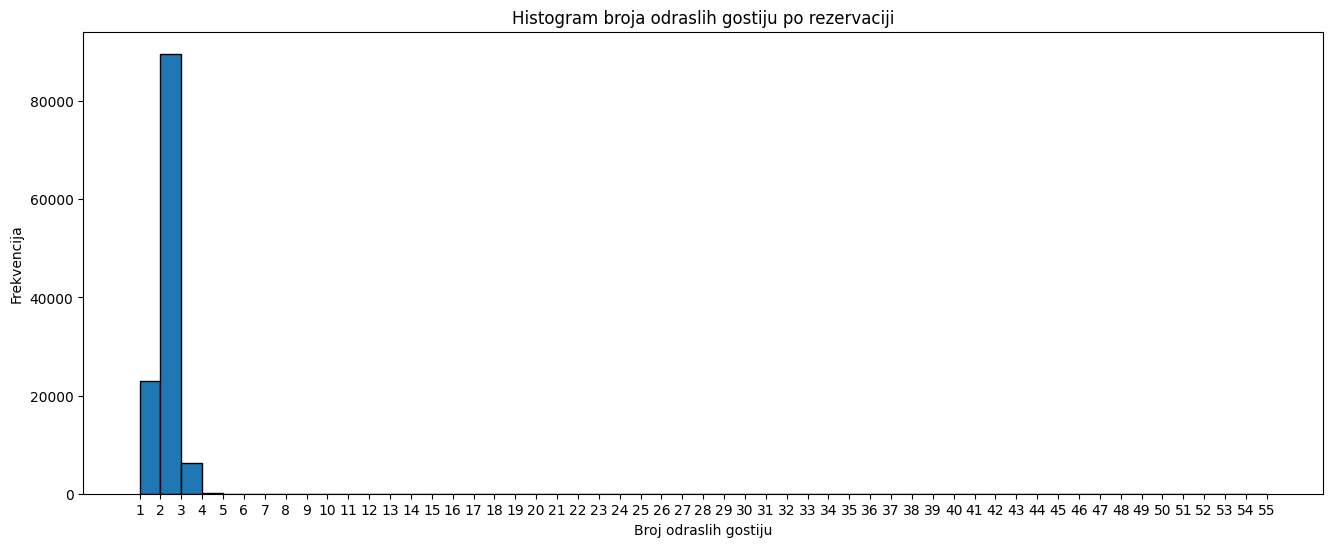

In [79]:
##histogram broj_odraslih_gostiju
plt.figure(figsize=(16, 6))
data['broj_odraslih_gostiju'].hist(bins=range(1, data['broj_odraslih_gostiju'].max() + 1), edgecolor='black')
plt.title('Histogram broja odraslih gostiju po rezervaciji')
plt.xlabel('Broj odraslih gostiju')
plt.ylabel('Frekvencija')
plt.xticks(range(1, data['broj_odraslih_gostiju'].max() + 1))
plt.grid(False)
plt.show()

In [80]:
#kreiranje tablice u kojoj se nalaze samo rezervacije gdje je broj dijece > 0
data_djeca = data[data['broj_djece_gostiju'] > 0]
data_djeca.info()
data_djeca.describe()

print(f'Postotak rezervacija u gdje je broj djece > 0 je: {(len(data_djeca)/len(data))*100}%')

<class 'pandas.core.frame.DataFrame'>
Index: 9332 entries, 13 to 119139
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   hotel_id                       9332 non-null   int32         
 1   datum_dolaska                  9332 non-null   datetime64[ns]
 2   datum_kreiranja_rezervacije    9332 non-null   datetime64[ns]
 3   datum_odjave                   9332 non-null   datetime64[ns]
 4   datum_otkazivanja_rezervacije  3259 non-null   datetime64[ns]
 5   broj_odraslih_gostiju          9332 non-null   int64         
 6   broj_djece_gostiju             9332 non-null   int64         
 7   zemlja_gosta                   9332 non-null   object        
 8   kanal_prodaje_id               9332 non-null   int32         
 9   tip_sobe_id                    9332 non-null   int32         
 10  cijena_nocenja                 9332 non-null   float64       
 11  status_rezervacije 

In [81]:
data_djeca.head()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,ukupan_broj_gostiju
13,0,2015-07-01,2014-12-10,2015-07-05,NaT,2,1,ESP,2,4,130.671257,Check-Out,1313236,1071898,3
45,0,2015-07-02,2015-05-24,2015-07-09,2015-06-02,2,2,PRT,2,4,129.190543,Canceled,1313268,1041988,4
55,0,2015-07-02,2015-02-12,2015-07-03,NaT,2,2,ESP,0,0,199.989686,Check-Out,1313278,1083127,4
65,0,2015-07-03,2015-01-25,2015-07-05,NaT,2,2,USA,2,4,169.658867,Check-Out,1313288,1089081,4
87,0,2015-07-03,2014-09-26,2015-07-24,2015-04-15,2,1,PRT,2,1,175.166066,Canceled,1313310,1012241,3


In [82]:
#kreiranje tablice gdje je broj djece == 0
data_bez_djece = data[data['broj_djece_gostiju'] == 0]
data_bez_djece.info()
data_bez_djece.describe()
data_bez_djece.head()

<class 'pandas.core.frame.DataFrame'>
Index: 109878 entries, 0 to 119209
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   hotel_id                       109878 non-null  int32         
 1   datum_dolaska                  109878 non-null  datetime64[ns]
 2   datum_kreiranja_rezervacije    109878 non-null  datetime64[ns]
 3   datum_odjave                   109878 non-null  datetime64[ns]
 4   datum_otkazivanja_rezervacije  40940 non-null   datetime64[ns]
 5   broj_odraslih_gostiju          109878 non-null  int64         
 6   broj_djece_gostiju             109878 non-null  int64         
 7   zemlja_gosta                   109878 non-null  object        
 8   kanal_prodaje_id               109878 non-null  int32         
 9   tip_sobe_id                    109878 non-null  int32         
 10  cijena_nocenja                 109878 non-null  float64       
 11  statu

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,ukupan_broj_gostiju
0,0,2015-07-01,2015-01-21,2015-07-01,NaT,2,0,PRT,0,0,100.000000,Check-Out,1313223,1077152,2
1,0,2015-07-01,2015-06-10,2015-07-01,NaT,2,0,PRT,0,0,100.000000,Check-Out,1313224,1017906,2
2,0,2015-07-01,2015-05-13,2015-07-02,NaT,1,0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1
3,0,2015-07-01,2014-05-30,2015-07-02,NaT,1,0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1
4,0,2015-07-01,2014-07-06,2015-07-03,NaT,2,0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2


In [83]:
#kreiranje tablice u kojoj se nalaze samo rezervacije koje nisu otkazane 
data_nije_otkazano = data[data['datum_otkazivanja_rezervacije'].isna()]
data_nije_otkazano.info()
data_nije_otkazano.describe()
data_nije_otkazano.head()

<class 'pandas.core.frame.DataFrame'>
Index: 75011 entries, 0 to 119209
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   hotel_id                       75011 non-null  int32         
 1   datum_dolaska                  75011 non-null  datetime64[ns]
 2   datum_kreiranja_rezervacije    75011 non-null  datetime64[ns]
 3   datum_odjave                   75011 non-null  datetime64[ns]
 4   datum_otkazivanja_rezervacije  0 non-null      datetime64[ns]
 5   broj_odraslih_gostiju          75011 non-null  int64         
 6   broj_djece_gostiju             75011 non-null  int64         
 7   zemlja_gosta                   75011 non-null  object        
 8   kanal_prodaje_id               75011 non-null  int32         
 9   tip_sobe_id                    75011 non-null  int32         
 10  cijena_nocenja                 75011 non-null  float64       
 11  status_rezervacije 

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,ukupan_broj_gostiju
0,0,2015-07-01,2015-01-21,2015-07-01,NaT,2,0,PRT,0,0,100.000000,Check-Out,1313223,1077152,2
1,0,2015-07-01,2015-06-10,2015-07-01,NaT,2,0,PRT,0,0,100.000000,Check-Out,1313224,1017906,2
2,0,2015-07-01,2015-05-13,2015-07-02,NaT,1,0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1
3,0,2015-07-01,2014-05-30,2015-07-02,NaT,1,0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1
4,0,2015-07-01,2014-07-06,2015-07-03,NaT,2,0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2


In [84]:
#kreiranje tablice u kojoj za svaki datum iz data racunam broji gostiju koji taj dan dolaze,
#također koliko je odraslih a koliko djece gostiju
dolasci = data.groupby('datum_dolaska').agg({
    'ukupan_broj_gostiju': 'sum',
    'broj_odraslih_gostiju': 'sum',
    'broj_djece_gostiju': 'sum'
}).reset_index()

dolasci.info()
dolasci.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   datum_dolaska          947 non-null    datetime64[ns]
 1   ukupan_broj_gostiju    947 non-null    int64         
 2   broj_odraslih_gostiju  947 non-null    int64         
 3   broj_djece_gostiju     947 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 29.7 KB


,datum_dolaska,ukupan_broj_gostiju,broj_odraslih_gostiju,broj_djece_gostiju
0,2015-01-01,12,12,0
1,2015-01-02,10,10,0
2,2015-01-03,11,11,0
3,2015-01-04,11,11,0
4,2015-01-05,7,7,0


In [85]:
#kreiranje tablice u kojoj za svaki datum iz data racunam broji gostiju koji taj dan dolaze,
#također koliko je odraslih a koliko djece gostiju ali samo u slucaju kada je broj djece >0

dolasci_djeca = data_djeca.groupby('datum_dolaska').agg({
    'ukupan_broj_gostiju': 'sum',
    'broj_odraslih_gostiju': 'sum',
    'broj_djece_gostiju': 'sum'
}).reset_index()

dolasci_djeca.info()
dolasci_djeca.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   datum_dolaska          886 non-null    datetime64[ns]
 1   ukupan_broj_gostiju    886 non-null    int64         
 2   broj_odraslih_gostiju  886 non-null    int64         
 3   broj_djece_gostiju     886 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.8 KB


,datum_dolaska,ukupan_broj_gostiju,broj_odraslih_gostiju,broj_djece_gostiju
0,2015-01-08,3,2,1
1,2015-01-29,4,2,2
2,2015-05-01,2,1,1
3,2015-05-06,9,5,4
4,2015-05-07,10,6,4


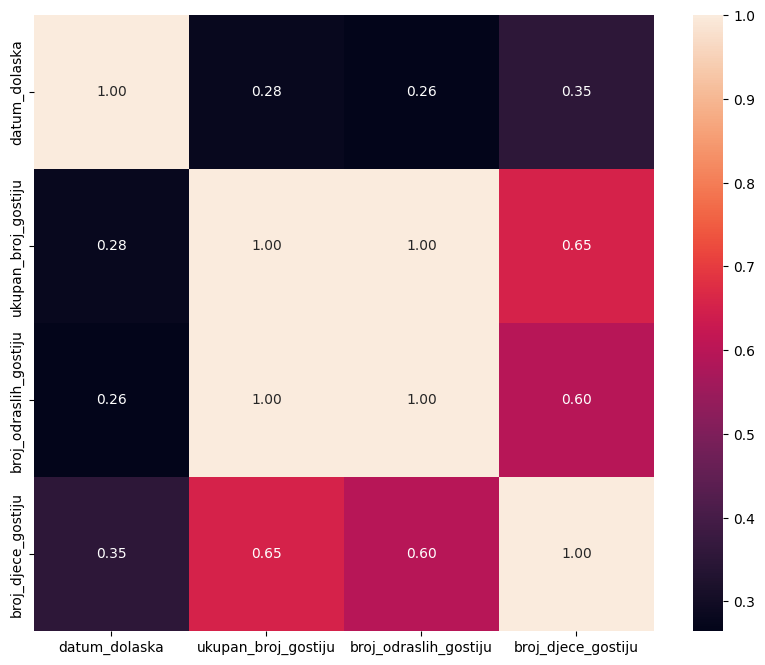

In [86]:
plt.figure(figsize=(10, 8))
sns.heatmap(dolasci.corr(), annot=True, fmt=".2f")
plt.show()

In [87]:
##analiza broj_dijece_gostiju
#ne uzimam u obzir slucajeve kada je broj_dijece_gostiju = 0


#računanje srednje vrijednosti broj_dijeca_gostiju
mean_djeca = data_djeca['broj_djece_gostiju'].mean()
mean_odrasli= data_djeca['broj_odraslih_gostiju'].mean()

#racunannje vjerojatnosti da je broj roditelja jednak 2
broj_odraslih_2 = data_djeca[data_djeca['broj_odraslih_gostiju'] == 2].shape[0]
ukupno_s_djecom = data_djeca.shape[0]
vjerojatnost = broj_odraslih_2 / ukupno_s_djecom if ukupno_s_djecom > 0 else 0

print(f'Aritmetička srednja vrijednost broja djece gostiju: {mean_djeca}')
print(f'Aritmetička srednja vrijednost broja odraslih gostiju za rezervacije s djecom: {mean_odrasli}')
print(f'Vjerojatnost da ce broj odraslih biti 2 ako je broj djece > 0 je {vjerojatnost*100}%')

Aritmetička srednja vrijednost broja djece gostiju: 1.430775825117874
Aritmetička srednja vrijednost broja odraslih gostiju za rezervacije s djecom: 1.9620660094299185
Vjerojatnost da ce broj odraslih biti 2 ako je broj djece > 0 je 87.01243034719246%


array([[<Axes: title={'center': 'hotel_id'}>,
        <Axes: title={'center': 'datum_dolaska'}>,
        <Axes: title={'center': 'datum_kreiranja_rezervacije'}>,
        <Axes: title={'center': 'datum_odjave'}>],
       [<Axes: title={'center': 'datum_otkazivanja_rezervacije'}>,
        <Axes: title={'center': 'broj_odraslih_gostiju'}>,
        <Axes: title={'center': 'broj_djece_gostiju'}>,
        <Axes: title={'center': 'kanal_prodaje_id'}>],
       [<Axes: title={'center': 'tip_sobe_id'}>,
        <Axes: title={'center': 'cijena_nocenja'}>,
        <Axes: title={'center': 'rezervacija_id'}>,
        <Axes: title={'center': 'gost_id'}>],
       [<Axes: title={'center': 'ukupan_broj_gostiju'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

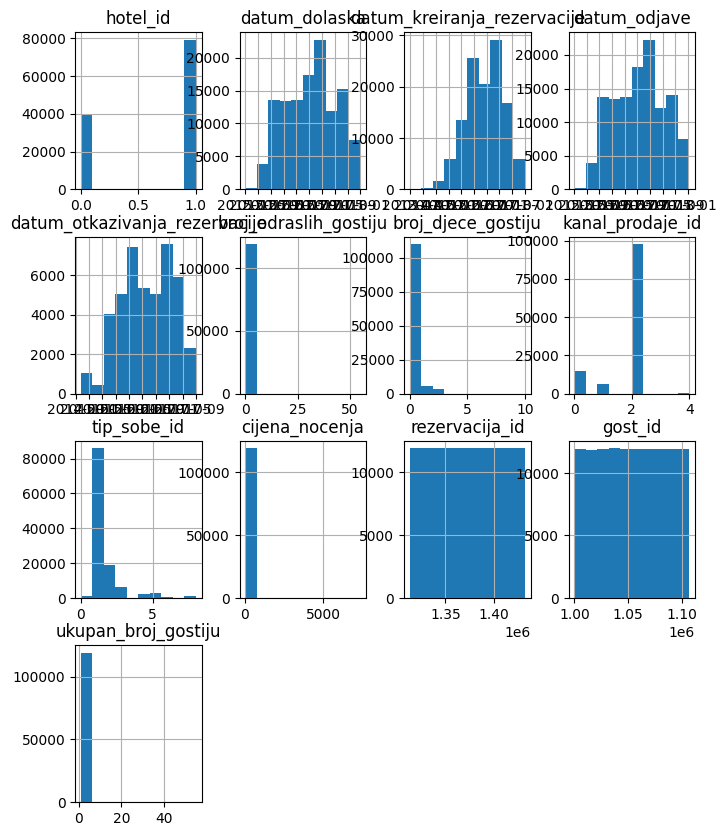

In [88]:
data.hist(figsize=(8,10))

In [111]:
numericki_data = data.select_dtypes(include=['number'])
korelacijska_matrica = numericki_data.corr()
numericki_data.corr()

,hotel_id,broj_odraslih_gostiju,broj_djece_gostiju,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,rezervacija_id,gost_id,ukupan_broj_gostiju
hotel_id,1.000000,-0.010571,-0.052766,0.184297,-0.136389,-0.043021,0.818077,-0.000715,-0.038762
broj_odraslih_gostiju,-0.010571,1.000000,0.032637,0.076123,0.119489,0.155676,-0.006745,0.002097,0.818861
broj_djece_gostiju,-0.052766,0.032637,1.000000,-0.039878,0.398837,0.268817,-0.025692,0.004512,0.600411
kanal_prodaje_id,0.184297,0.076123,-0.039878,1.000000,-0.107287,-0.034522,0.101398,-0.000729,0.038005
tip_sobe_id,-0.136389,0.119489,0.398837,-0.107287,1.000000,0.259901,-0.089116,0.001568,0.324656
cijena_nocenja,-0.043021,0.155676,0.268817,-0.034522,0.259901,1.000000,0.022885,0.000866,0.278940
rezervacija_id,0.818077,-0.006745,-0.025692,0.101398,-0.089116,0.022885,1.000000,0.001796,-0.020152
gost_id,-0.000715,0.002097,0.004512,-0.000729,0.001568,0.000866,0.001796,1.000000,0.004269
ukupan_broj_gostiju,-0.038762,0.818861,0.600411,0.038005,0.324656,0.278940,-0.020152,0.004269,1.000000


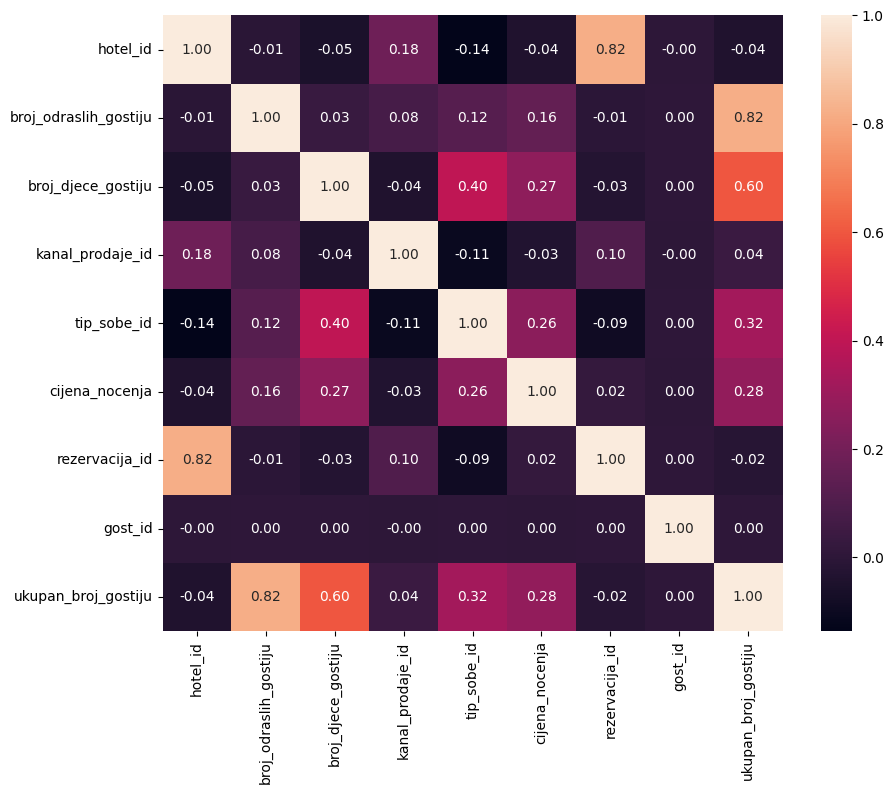

In [112]:
plt.figure(figsize=(10, 8))
sns.heatmap(korelacijska_matrica, annot=True, fmt=".2f")
plt.show()

In [91]:
#Analza broja korelacije izmedu broja gostiju i ID-a tipa sobe 
dvoje_odraslih = data_bez_djece[data_bez_djece['broj_odraslih_gostiju']==2]
dvoje_odraslih.head()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,ukupan_broj_gostiju
0,0,2015-07-01,2015-01-21,2015-07-01,NaT,2,0,PRT,0,0,100.000000,Check-Out,1313223,1077152,2
1,0,2015-07-01,2015-06-10,2015-07-01,NaT,2,0,PRT,0,0,100.000000,Check-Out,1313224,1017906,2
4,0,2015-07-01,2014-07-06,2015-07-03,NaT,2,0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2
5,0,2015-07-01,2015-04-21,2015-07-03,NaT,2,0,GBR,2,1,143.304560,Check-Out,1313228,1044263,2
6,0,2015-07-01,2015-06-25,2015-07-03,NaT,2,0,PRT,0,0,161.502814,Check-Out,1313229,1022260,2


In [92]:
frekvencija_tipa_sobe = dvoje_odraslih['tip_sobe_id'].value_counts()
print(frekvencija_tipa_sobe)

tip_sobe_id
1    61196
2    13064
3     4886
5     1049
8      735
4      411
0      167
6       48
7        4
Name: count, dtype: int64


<Axes: >

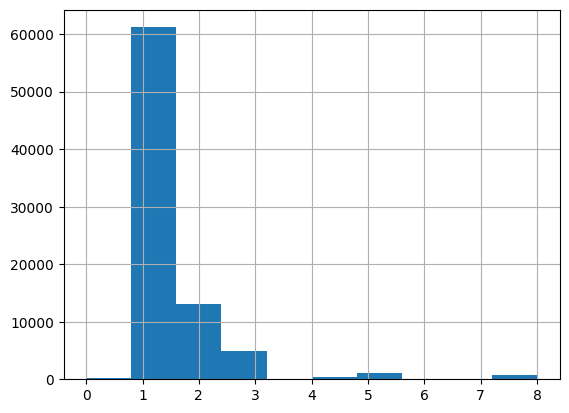

In [93]:
dvoje_odraslih['tip_sobe_id'].hist()

In [95]:
jedan_odrasli = data_bez_djece[data_bez_djece['broj_odraslih_gostiju']==1]
jedan_odrasli.head()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,ukupan_broj_gostiju
2,0,2015-07-01,2015-05-13,2015-07-02,NaT,1,0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1
3,0,2015-07-01,2014-05-30,2015-07-02,NaT,1,0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1
20,0,2015-07-01,2015-01-19,2015-07-06,NaT,1,0,GBR,2,5,93.994613,Check-Out,1313243,1062925,1
30,0,2015-07-01,2015-03-25,2015-07-15,NaT,1,0,0,0,1,108.777471,Check-Out,1313253,1025267,1
77,0,2015-07-03,2014-08-02,2015-07-07,NaT,1,0,PRT,2,1,90.944040,Check-Out,1313300,1014575,1


In [97]:
frekvencija_tipa_sobe_jedan_odrasli = jedan_odrasli['tip_sobe_id'].value_counts()
print(frekvencija_tipa_sobe_jedan_odrasli)

tip_sobe_id
1    19984
2     1731
3      618
5      105
4       82
8       33
0       18
6        5
7        1
Name: count, dtype: int64


,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,ukupan_broj_gostiju
2,0,2015-07-01,2015-05-13,2015-07-02,NaT,1,0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1
3,0,2015-07-01,2014-05-30,2015-07-02,NaT,1,0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1
20,0,2015-07-01,2015-01-19,2015-07-06,NaT,1,0,GBR,2,5,93.994613,Check-Out,1313243,1062925,1
30,0,2015-07-01,2015-03-25,2015-07-15,NaT,1,0,0,0,1,108.777471,Check-Out,1313253,1025267,1
77,0,2015-07-03,2014-08-02,2015-07-07,NaT,1,0,PRT,2,1,90.944040,Check-Out,1313300,1014575,1


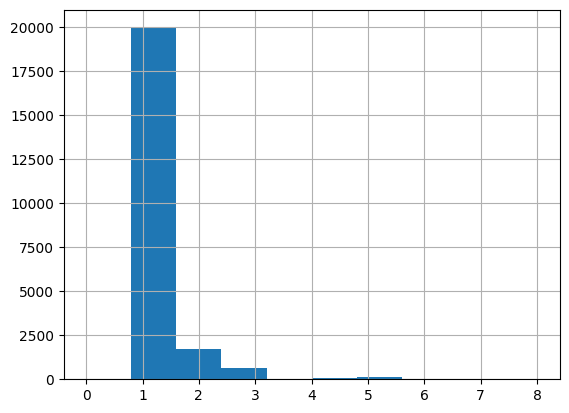

In [117]:
jedan_odrasli['tip_sobe_id'].hist()
jedan_odrasli.head()

<Axes: >

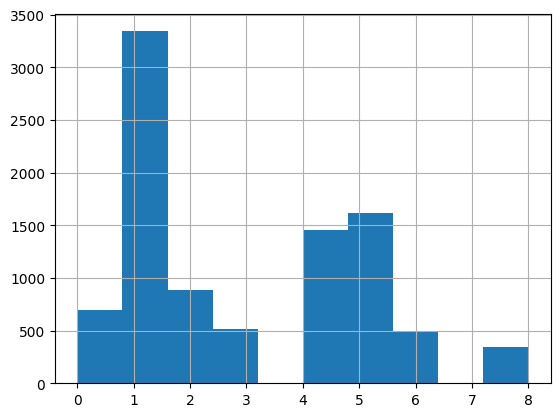

In [100]:
data_djeca['tip_sobe_id'].hist()

In [101]:
data_jedno_djete = data_djeca[data_djeca['broj_djece_gostiju']==1]
data_jedno_djete.head()


,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,ukupan_broj_gostiju
13,0,2015-07-01,2014-12-10,2015-07-05,NaT,2,1,ESP,2,4,130.671257,Check-Out,1313236,1071898,3
87,0,2015-07-03,2014-09-26,2015-07-24,2015-04-15,2,1,PRT,2,1,175.166066,Canceled,1313310,1012241,3
98,0,2015-07-03,2014-09-14,2015-07-10,NaT,2,1,PRT,2,2,80.584744,Check-Out,1313321,1011049,3
109,0,2015-07-04,2014-08-29,2015-07-11,NaT,2,1,PRT,2,1,70.847492,Check-Out,1313332,1077008,3
111,0,2015-07-04,2014-11-28,2015-07-11,NaT,2,1,PRT,2,3,71.492203,Check-Out,1313334,1085359,3


<Axes: >

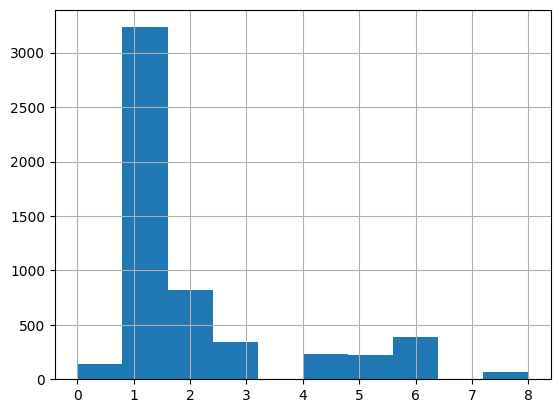

In [102]:
data_jedno_djete['tip_sobe_id'].hist()

<Axes: >

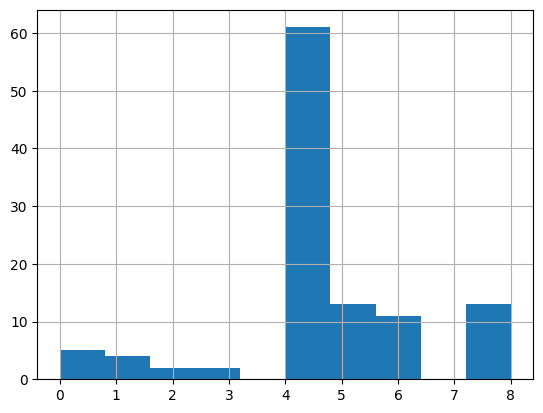

In [104]:
data_troje_djece=data_djeca[data_djeca['broj_djece_gostiju']==3] 
data_troje_djece['tip_sobe_id'].hist()

<Axes: >

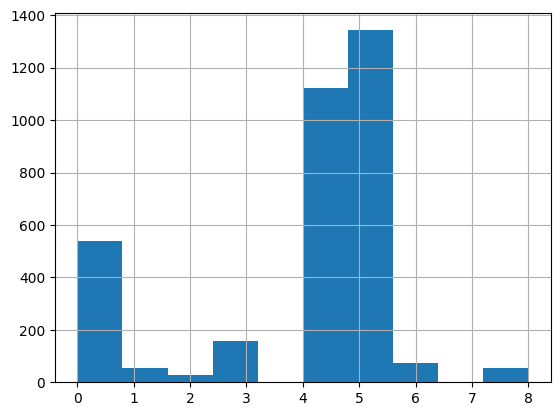

In [107]:
data_dvoje_djece = data_djeca[(data_djeca['broj_djece_gostiju'] == 2) & (data_djeca['broj_odraslih_gostiju'] == 2)]
data_dvoje_djece['tip_sobe_id'].hist()

In [129]:
#promatranje korelacije izmedu cijene i broja osoba
korelacija = data['ukupan_broj_gostiju'].corr(data['cijena_nocenja'])

print(f"Korelacija između ukupnog broja osoba i cijena nocenja: {korelacija}")

Korelacija između ukupnog broja osoba i cijena nocenja: 0.2789398736391813


In [130]:
korelacija = data_bez_djece['ukupan_broj_gostiju'].corr(data_bez_djece['cijena_nocenja'])

print(f"Korelacija između ukupnog broja osoba i cijena nocenja: {korelacija}")

Korelacija između ukupnog broja osoba i cijena nocenja: 0.1449235216935832


In [131]:
korelacija = data_djeca['ukupan_broj_gostiju'].corr(data_djeca['cijena_nocenja'])

print(f"Korelacija između ukupnog broja osoba i cijena nocenja: {korelacija}")

Korelacija između ukupnog broja osoba i cijena nocenja: 0.35279554933275203
